In [52]:
%matplotlib inline
from pylab import imread,imshow
import numpy as np
import cv2
import torch

In [50]:
!pip install iglovikov_helper_functions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [55]:
image = load_rgb("image.png")

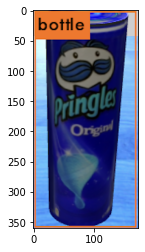

In [56]:
imshow(image)

In [57]:
pixels = np.float32(image.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

In [58]:
dominant = palette[np.argmax(counts)]

In [59]:
print(dominant)

[17.076782 19.026674 77.23075 ]


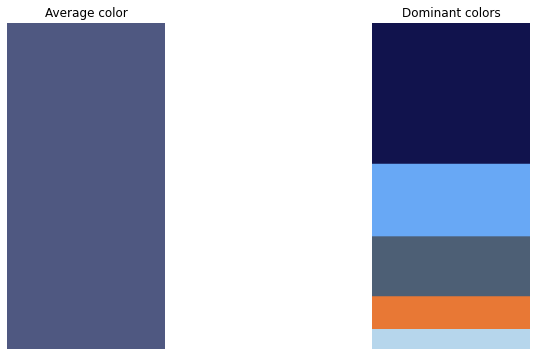

In [63]:
from torch.nn.modules import distance
import matplotlib.pyplot as plt

average = image.mean(axis=0).mean(axis=0)
avg_patch = np.ones(shape=image.shape, dtype=np.uint8)*np.uint8(average)

indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
rows = np.int_(image.shape[0]*freqs)

dom_patch = np.zeros(shape=image.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
    
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)

In [64]:
if dominant[0] > 210 and dominant[1] > 210 and dominant[2] > 210:
    dominant_colour = "white"
else:
    dominant_colour = "colour"

print(dominant_colour)

colour
